<h1> Homework Questions for Session 2 Regression </h1>  

 [Link to Session 2 Homework Questions](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/02-regression/homework.md)

<h2> Dataset </h2>

Data is from California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [26]:
import wget
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
filename = wget.download(url)
filename

100% [..........................................................................] 1423529 / 1423529

'housing.csv'

<h2> Exploratory Data Analysis </h2>

In [206]:
#Load dataset
import pandas as pd
import numpy as np

df1= pd.read_csv('housing.csv')
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='median_house_value', ylabel='Count'>

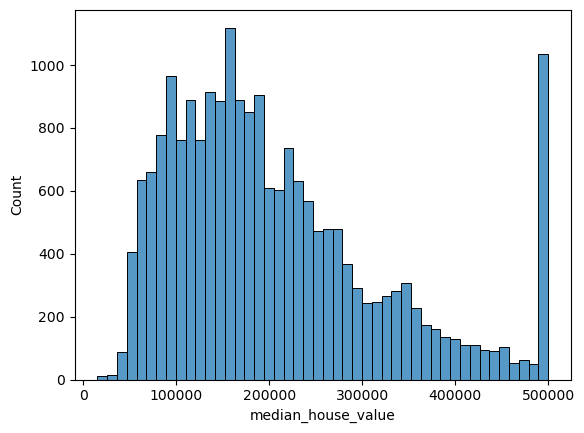

In [211]:
#Distribution of median_house_value
import matplotlib as plt
import seaborn as sns
%matplotlib inline

sns.histplot(df1.median_house_value)

The visualisation above, show the variable `'median_house_value'` has a long tail distribution with the median house value decreasing towards the end of the distribution. 

<u> Prepare the dataset </u>

In [212]:
#Keep data for ocean_proximity is either '<1H OCEAN' or 'INLAND' & reset index
df1_ocean = df1[(df1['ocean_proximity'] =='<1H OCEAN') | (df1['ocean_proximity'] =='INLAND')]
df_ocean = df1_ocean.reset_index()

In [213]:
#Select first 5 rows
df_ocean.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [214]:
for col in df_ocean.columns:
    print(col)
    print(df_ocean[col].unique()[:5])

index
[701 830 859 860 861]
longitude
[-121.97 -121.99 -121.96 -121.98 -122.  ]
latitude
[37.64 37.61 37.57 37.58 37.49]
housing_median_age
[32.  9. 21. 15. 20.]
total_rooms
[1283. 3666. 4342. 3575. 4126.]
total_bedrooms
[ 194.  711.  783.  597. 1031.]
population
[ 485. 2341. 2172. 1777. 2079.]
households
[171. 703. 789. 559. 975.]
median_income
[6.0574 4.6458 4.6146 5.7192 3.6832]
median_house_value
[431000. 217000. 247600. 283500. 216900.]
ocean_proximity
['<1H OCEAN' 'INLAND']


In [215]:
#Prepare dataset
df = df_ocean[['latitude', 'longitude', 'housing_median_age', 'total_rooms',
                     'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


<h2> Question 1 </h2>

In [216]:
#Summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15687 entries, 0 to 15686
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [217]:
#Find missing values
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<h2> Question 2 </h2>

In [218]:
#Dataset Information
df.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,2.066387,1.780380,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,32.610000,-124.140000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,33.940000,-121.070000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,34.160000,-118.370000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,37.340000,-117.990000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<u> Prepare and split the dataset </u>  

In [220]:
#Set up Validation Framework
#train/val/test: 60%/20%/20%

n = len(df)
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_val - n_test

In [221]:
#Check Dataset 
n, n_train + n_val + n_test

(15687, 15687)

In [222]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [225]:
#Shuffle Dataset
import random

np.random.seed(42) #shuffle with seed so results are reproducible
idx = np.arange(n)
np.random.shuffle(idx)

In [226]:
#Split dataset per shuffle
#first record to end record
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train::n_train + n_val]] 
df_train = df.iloc[idx[n_train + n_val:]]

In [228]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9866,33.90,-117.44,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0,INLAND
365,38.03,-121.65,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0,INLAND
13902,37.25,-121.85,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0,<1H OCEAN
12089,32.78,-116.97,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0,<1H OCEAN
12519,37.97,-121.32,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0,INLAND


In [229]:
#Check datasets
len(df_train), len(df_val), len(df_test)

(3137, 1, 3137)

In [231]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [232]:
#Apply Log Transformation on median_house_value

y_train=np.log1p(df_train.median_house_value)
y_val=np.log1p(df_val.median_house_value)
y_test=np.log1p(df_test.median_house_value)

In [ ]:
#Delete column of previous unused Log Transformation column

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [233]:
y_train

0       11.909693
1       12.167337
2       12.393386
3       11.823354
4       11.394153
          ...    
3132    13.122367
3133    12.500237
3134    12.364789
3135    11.331416
3136    12.507661
Name: median_house_value, Length: 3137, dtype: float64

In [234]:
#Check Length of y_train dataset
len(y_train)

3137